## Objective

Insurance companies need to accurately predict the cost of health insurance for individuals to
set premiums appropriately. However, traditional methods of cost prediction often rely on broad
actuarial tables and historical averages, which may not account for the nuanced differences
among individuals. By leveraging machine learning techniques, insurers can predict more
accurately the insurance costs tailored to individual profiles, leading to more competitive pricing
and better risk management.

This case study aims to leverage machine learning models to predict the insurance premium for each
customer individually, thus providing a tailored service and competitive rates to the insurance buyers
and better market positioning and reduced risk to the insurance company.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#from IPython.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [ ]:
df.shape

## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,986.0,41.745436,13.963371,18.0,30.0,42.0,53.0,66.0
Diabetes,986.0,0.419878,0.493789,0.0,0.0,0.0,1.0,1.0
BloodPressureProblems,986.0,0.468560,0.499264,0.0,0.0,0.0,1.0,1.0
AnyTransplants,986.0,0.055781,0.229615,0.0,0.0,0.0,0.0,1.0
AnyChronicDiseases,986.0,0.180527,0.384821,0.0,0.0,0.0,0.0,1.0
Height,986.0,168.182556,10.098155,145.0,161.0,168.0,176.0,188.0
Weight,986.0,76.950304,14.265096,51.0,67.0,75.0,87.0,132.0
KnownAllergies,986.0,0.215010,0.411038,0.0,0.0,0.0,0.0,1.0
HistoryOfCancerInFamily,986.0,0.117647,0.322353,0.0,0.0,0.0,0.0,1.0
NumberOfMajorSurgeries,986.0,0.667343,0.749205,0.0,0.0,1.0,1.0,3.0


There is a mean pull in target variable PremiumPrice. This means there are some positive outliers present in that variable.

The feature Height varies from 145 to 188, with a mean of 168.18 and median of 168. While, the feature Weight varies from 51 to 132, with a mean of 76.95 and median of 75.

#### Distribution Analysis

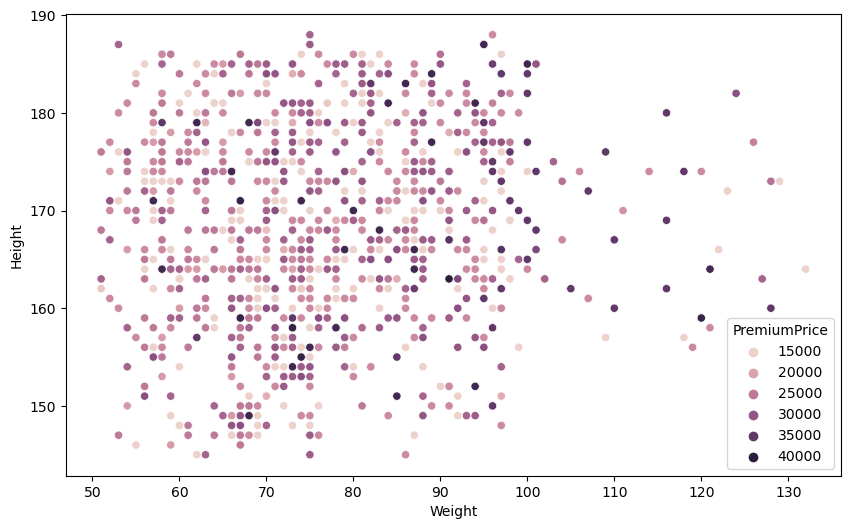

In [6]:
# Variation of height, weight with premium price
plt.figure(figsize=(10,6))
sns.scatterplot(x='Weight', y='Height', data=df, hue='PremiumPrice')
plt.show()

There is no definite pattern in the variation of premium price with respect to height and weight.

There appear to be some outliers in the data as well.

In [7]:
# Creating a feature 'AnyIssue'. 'AnyIssue' is 1 when a person has presence of any combination of {Diabetes, BloodPressureProblems, AnyTransplants, AnyChronicDiseases, KnownAllergies, HistoryOfCancerInFamily, NumberOfMajorSurgeries>=1}, else it is 0
df2 = df.copy()
df2['AnyIssue'] = df2[['Diabetes','BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']].apply(lambda x: 1 if x.sum()>0 else 0, axis=1)
df2.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,AnyIssue
0,45,0,0,0,0,155,57,0,0,0,25000,0
1,60,1,0,0,0,180,73,0,0,0,29000,1
2,36,1,1,0,0,158,59,0,0,1,23000,1
3,52,1,1,0,1,183,93,0,0,2,28000,1
4,38,0,0,0,1,166,88,0,0,1,23000,1


In [8]:
df2['AnyIssue'].value_counts()

1    853
0    133
Name: AnyIssue, dtype: int64

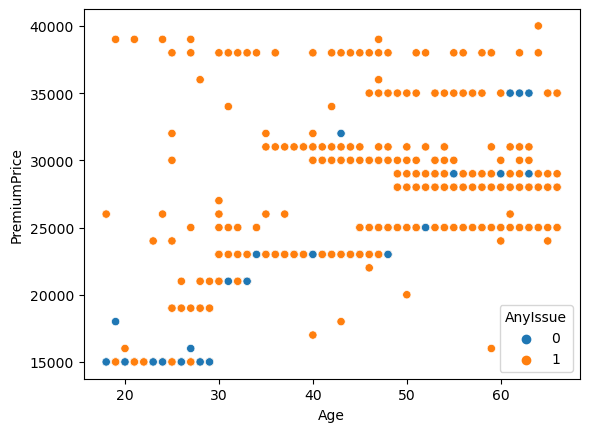

In [9]:
# Age vs PremiumPrice with presence/absence of issue
sns.scatterplot(x='Age', y='PremiumPrice', data=df2, hue='AnyIssue')
plt.show()

Younger people with issues tend to have lower premiums compared to that of older people with issues

#### Correlation Analysis

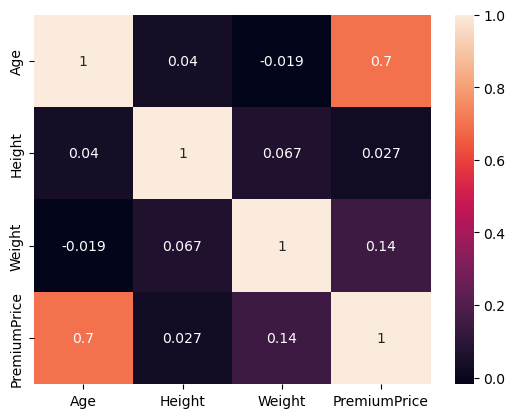

In [10]:
sns.heatmap(df[['Age','Height','Weight','PremiumPrice']].corr(), annot=True)
plt.show()

Age is strongly positively correlated with premium price. Height and weight are weakly positively correlated with premium price.

#### Outlier Detection

In [11]:
cols = ['Age', 'Height', 'Weight']

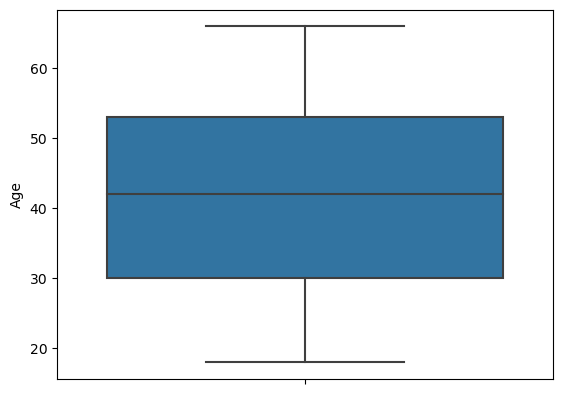

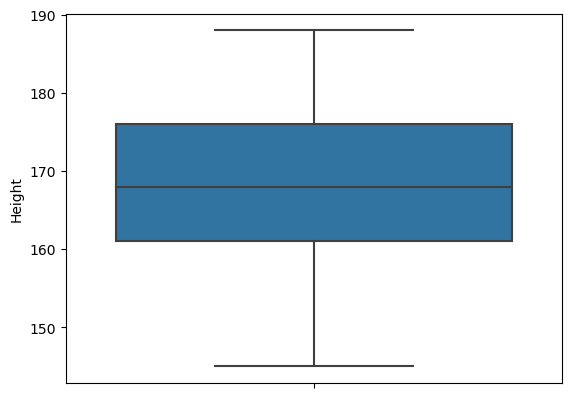

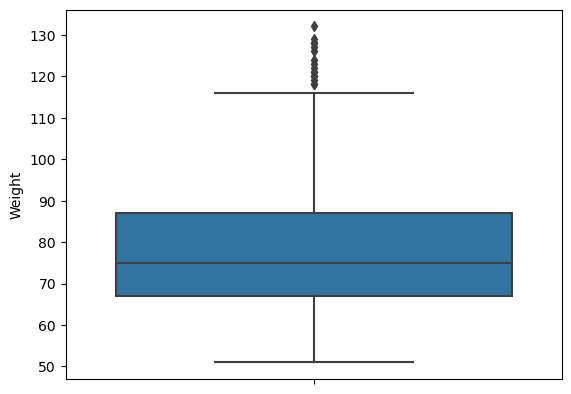

In [12]:
# Using boxplot to visualize outliers
for col in cols:
    sns.boxplot(y=col, data=df)
    plt.show()

There appear to be positive outliers in weight

In [13]:
per25, per75 = df['Weight'].quantile(q=0.25), df['Weight'].quantile(q=0.75)
iqr = per75 - per25
upper_bound = per75 + 1.5*iqr
temp = df.loc[df['Weight']>upper_bound]
print(temp.shape)
temp.head()

(16, 11)


,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
154,21,0,0,0,0,157,118,1,0,1,15000
158,43,0,0,0,0,158,121,0,0,0,23000
183,36,0,0,0,0,156,119,0,0,0,23000
186,19,0,0,0,0,173,129,1,0,0,15000
192,50,1,0,0,0,163,127,0,0,2,28000


In [14]:
print('Percentage outlier:', round(100*temp.shape[0]/df.shape[0], 2))

Percentage outlier: 1.62


Even though the percentage of outliers in weight is less, they will be retained since they represent weights of actual customers in the past. And, if there were customers with much higher weight in the past, it is very likely that there would be such customers in the future as well. Removing these records will remove important information from our predictive machine learning model.

#### Hypothesis Testing

In [15]:
# To test whether categorical features such as 'Diabetes' and 'AnyTransplants' have varying premium prices with there presence/absence
from scipy import stats

In [16]:
cats = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily']

In [17]:
def ttest(data, col):
    alpha = 0.05
    a, b = data.loc[data[col]==1]['PremiumPrice'], data.loc[data[col]==0]['PremiumPrice']
    t_stat, p_val = stats.ttest_ind(a, b, alternative='greater')
    
    if p_val < alpha:
        print(f'Reject Ho. The premium price increased with presence of {col}')
    else:
        print(f'Cannot reject Ho. The premium price does not increase with the presence of {col}')

In [18]:
# Ho: Premium price does not increase with the presence of feature
# Ha: Premium price increases with the presence of the feature
i = 1
for col in cats:
    print(f'{i}.', end=' ')
    ttest(df, col)
    i += 1
    print()

1. Reject Ho. The premium price increased with presence of Diabetes

2. Reject Ho. The premium price increased with presence of BloodPressureProblems

3. Reject Ho. The premium price increased with presence of AnyTransplants

4. Reject Ho. The premium price increased with presence of AnyChronicDiseases

5. Cannot reject Ho. The premium price does not increase with the presence of KnownAllergies

6. Reject Ho. The premium price increased with presence of HistoryOfCancerInFamily



In [19]:
# Ho: Premium price does not vary with the presence/increase in number of surgeries. All distributions have same mean
# Ha: Premium price varies with the presence/increase in number of surgeries. Atleast one mean is significantly different from the rest
col = 'NumberOfMajorSurgeries'
alpha = 0.05
a, b, c, d = df.loc[df[col]==0]['PremiumPrice'], df.loc[df[col]==1]['PremiumPrice'], df.loc[df[col]==2]['PremiumPrice'], df.loc[df[col]==3]['PremiumPrice']
f_stat, p_val = stats.f_oneway(a, b, c, d)

if p_val < alpha:
    print(f'Reject Ho. The premium price varies with presence/increase of {col}')
else:
    print(f'Cannot reject Ho. The premium price does not vary with the presence of {col}')

Reject Ho. The premium price varies with presence/increase of NumberOfMajorSurgeries


C:\Users\Ishaan\AppData\Local\Temp\ipykernel_5904\3179453882.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(i)


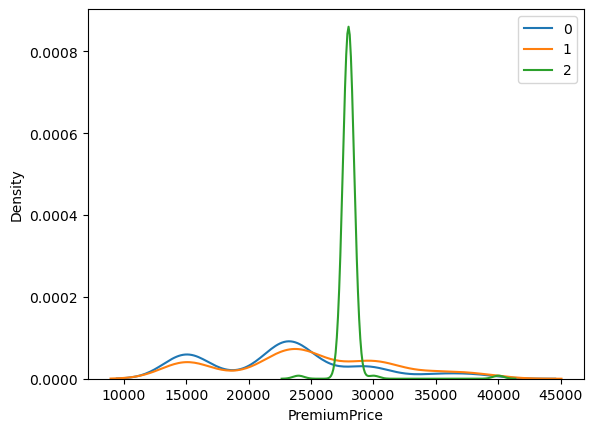

In [20]:
for i in [a,b,c,d]:
    sns.kdeplot(i)
    plt.plot()
plt.legend([0,1,2,3])

In [21]:
df[col].value_counts()

0    479
1    372
2    119
3     16
Name: NumberOfMajorSurgeries, dtype: int64

In [22]:
# Evaluating the association between categorical variables

In [23]:
# AnyChronicDiseases vs HistoryOfCancerInFamily
# Ho: There is no association between AnyChronicDiseases and HistoryOfCancerInFamily
# Ha: There is assocciation between AnyChronicDiseases and HistoryOfCancerInFamily
alpha = 0.05

chi_stat, p_val, _, _ = stats.chi2_contingency([df['AnyChronicDiseases'].value_counts(), df['HistoryOfCancerInFamily'].value_counts()])

if p_val < alpha:
    print('Reject Ho. There is assocciation between AnyChronicDiseases and HistoryOfCancerInFamily')
else:
    print('Cannot reject Ho. There is no association between AnyChronicDiseases and HistoryOfCancerInFamily')

Reject Ho. There is assocciation between AnyChronicDiseases and HistoryOfCancerInFamily


In [24]:
# Diabetes vs BloodPressureProblems
# Ho: There is no association between Diabetes and BloodPressureProblems
# Ha: There is association between Diabetes and BloodPressureProblems

chi_stat, p_val, _, _ = stats.chi2_contingency([df['AnyChronicDiseases'].value_counts(), df['HistoryOfCancerInFamily'].value_counts()])

if p_val < alpha:
    print('Reject Ho. There is association between Diabetes and BloodPressureProblems')
else:
    print('Cannot reject Ho. There is no association between Diabetes and BloodPressureProblems')

Reject Ho. There is association between Diabetes and BloodPressureProblems


In [25]:
# BloodPressureProblems vs AnyChronicDiseases
# Ho: There is no association between BloodPressureProblems and AnyChronicDiseases
# Ha: There is association between BloodPressureProblems and AnyChronicDiseases

chi_stat, p_val, _, _ = stats.chi2_contingency([df['AnyChronicDiseases'].value_counts(), df['HistoryOfCancerInFamily'].value_counts()])

if p_val < alpha:
    print('Reject Ho. There is association between BloodPressureProblems and AnyChronicDiseases')
else:
    print('Cannot reject Ho. There is no association between BloodPressureProblems and AnyChronicDiseases')

Reject Ho. There is association between BloodPressureProblems and AnyChronicDiseases


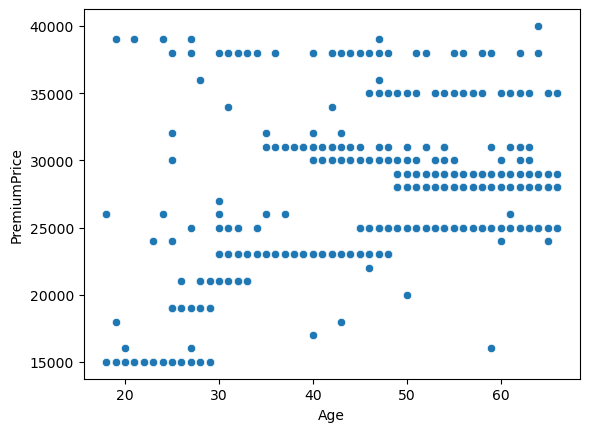

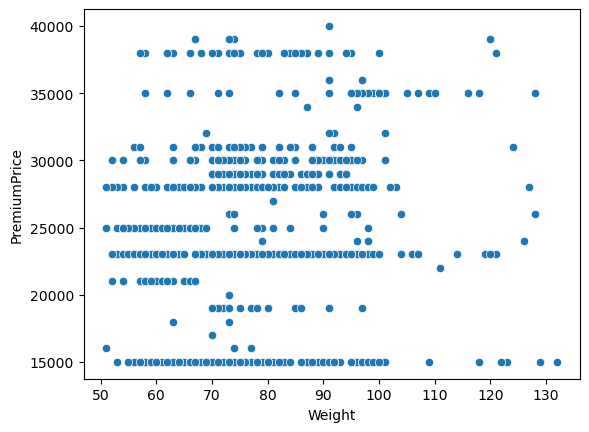

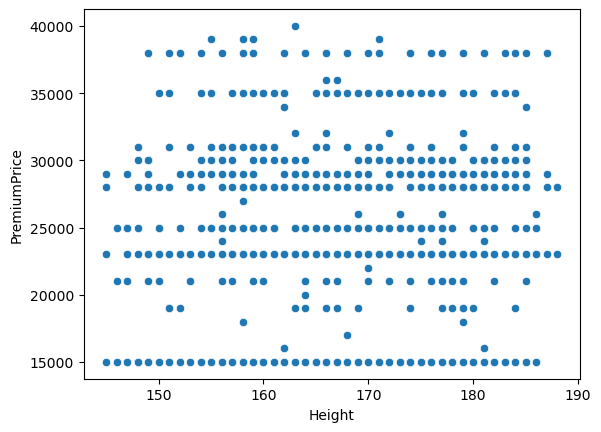

In [26]:
# Testing whether various numerical predictors impact premium price
nums = ['Age', 'Weight', 'Height']

for col in nums:
    sns.scatterplot(x=col, y='PremiumPrice', data=df)
    plt.show()

Age appears to have a positive impact on premium price

## ML Modeling

#### Data Preprocessing

In [27]:
# Handling missing values

In [28]:
for col in df.columns:
    print(f'{col} -> {df[col].value_counts()}')

Age -> 43    30
27    27
42    27
35    26
45    25
59    25
44    24
25    24
48    24
66    23
46    23
18    23
33    23
49    23
32    22
29    22
47    22
64    22
24    22
30    22
19    21
62    21
21    21
31    20
51    20
50    20
54    20
63    19
36    19
52    19
40    19
22    19
37    18
34    18
41    18
38    17
20    17
55    17
53    17
60    17
28    17
65    17
61    16
58    16
56    15
23    13
26    13
57    12
39    11
Name: Age, dtype: int64
Diabetes -> 0    572
1    414
Name: Diabetes, dtype: int64
BloodPressureProblems -> 0    524
1    462
Name: BloodPressureProblems, dtype: int64
AnyTransplants -> 0    931
1     55
Name: AnyTransplants, dtype: int64
AnyChronicDiseases -> 0    808
1    178
Name: AnyChronicDiseases, dtype: int64
Height -> 164    42
166    42
174    38
165    38
175    35
176    34
163    34
170    32
169    32
168    31
167    29
172    29
178    28
177    28
179    28
159    27
156    27
162    27
173    26
181    26
161    26
182    24
158 

In [29]:
df.isna().sum().sum()

0

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


There appears to be no missing value in the dataset

In [31]:
# Feature Engineering

In [32]:
# BMI -> Weight(kg)/Height(m)^2
df['BMI'] = round(df['Weight']/(df['Height']/100)**2, 2)
df = pd.concat([df.drop('PremiumPrice', axis=1), df[['PremiumPrice']]], axis=1)
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,23.73,25000
1,60,1,0,0,0,180,73,0,0,0,22.53,29000
2,36,1,1,0,0,158,59,0,0,1,23.63,23000
3,52,1,1,0,1,183,93,0,0,2,27.77,28000
4,38,0,0,0,1,166,88,0,0,1,31.93,23000


In [33]:
# Scaling and Encoding

In [34]:
# Scaling numerical columns
nums.append('BMI')
nums

['Age', 'Weight', 'Height', 'BMI']

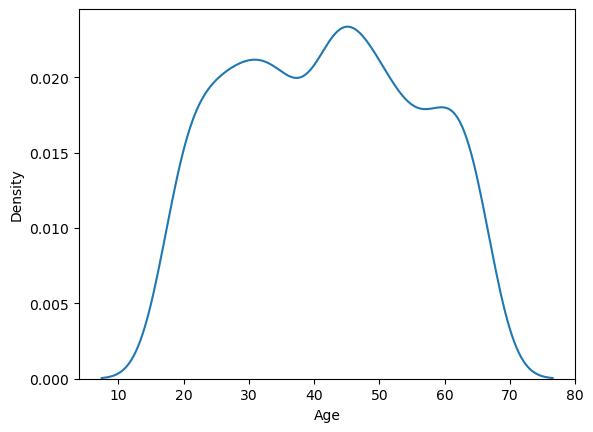

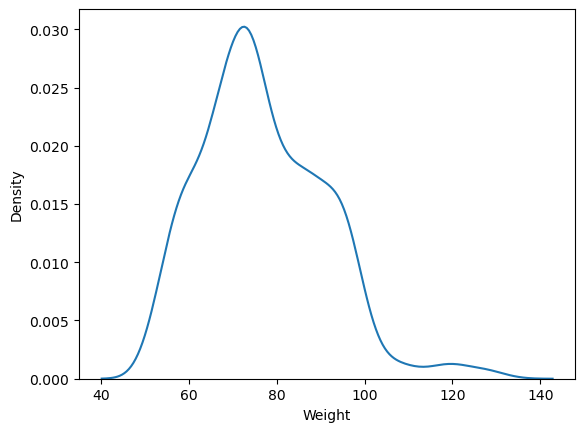

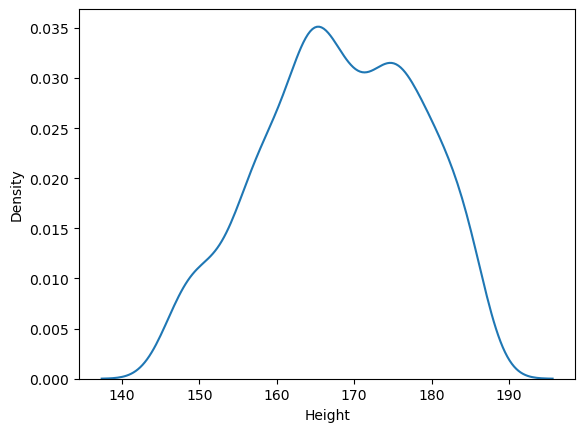

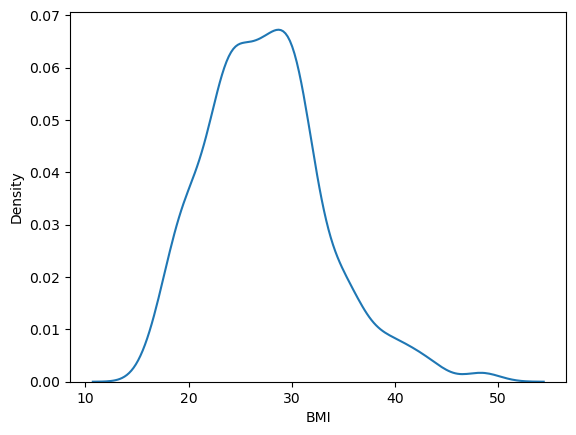

In [35]:
for col in nums:
    sns.kdeplot(df[col])
    plt.show()

Since the distributions (somewhat) resemble normal distribution, we will apply standardization for scaling

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
for col in nums:
    scaler = StandardScaler()
    df[col] = scaler.fit_transform(df[[col]])
    
df[nums].head()

,Age,Weight,Height,BMI
0,0.233197,-1.399250,-1.306105,-0.634915
1,1.307981,-0.277062,1.170852,-0.839142
2,-0.411674,-1.258976,-1.008870,-0.651934
3,0.734763,1.125674,1.468086,0.052650
4,-0.268369,0.774990,-0.216244,0.760638


In [38]:
# Encoding categorical columns
cats = cats + ['NumberOfMajorSurgeries']
cats

['Diabetes',
 'BloodPressureProblems',
 'AnyTransplants',
 'AnyChronicDiseases',
 'KnownAllergies',
 'HistoryOfCancerInFamily',
 'NumberOfMajorSurgeries']

In [39]:
df[cats].head()

,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,1,0,0,0,0,1
3,1,1,0,1,0,0,2
4,0,0,0,1,0,0,1


In [40]:
df[cats].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Diabetes                 986 non-null    int64
 1   BloodPressureProblems    986 non-null    int64
 2   AnyTransplants           986 non-null    int64
 3   AnyChronicDiseases       986 non-null    int64
 4   KnownAllergies           986 non-null    int64
 5   HistoryOfCancerInFamily  986 non-null    int64
 6   NumberOfMajorSurgeries   986 non-null    int64
dtypes: int64(7)
memory usage: 54.0 KB


These features are already correctly encoded as 0/1 shows the presence and absence of a medical condition. Similarly, 0, 1, 2, 3 shows the number of major surgeries a person has had.

#### Model Selection

In [41]:
# Baseline/Benchmark model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Note: Since the sample size is small, we will not split data into training, testing and validation datasets, but split only into training and testing. We will later employ cross-validation to tune the more complex models

In [42]:
X = df.drop('PremiumPrice', axis=1)
y = df['PremiumPrice']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train.shape, y_train.shape

((788, 11), (788,))

In [43]:
x_test.shape, y_test.shape

((198, 11), (198,))

In [44]:
# Linear regression
model_linreg = LinearRegression()
model_linreg.fit(x_train, y_train)
y_pred_train = model_linreg.predict(x_train)
y_pred_test = model_linreg.predict(x_test)

In [45]:
# Performance metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score

In [46]:
print('Coefficient of Determination:', r2_score(y_train, y_pred_train))
print('RMSE:', mse(y_train, y_pred_train)**0.5)
print('MAE:', mae(y_train, y_pred_train))
print('MAPE:', mape(y_train, y_pred_train))

Coefficient of Determination: 0.6220970461822966
RMSE: 3792.5972955189923
MAE: 2694.143006456591
MAPE: 0.11687186226859458


In [47]:
# test sample
print('Coefficient of Determination:', r2_score(y_test, y_pred_test))
print('RMSE:', mse(y_test, y_pred_test)**0.5)
print('MAE:', mae(y_test, y_pred_test))
print('MAPE:', mape(y_test, y_pred_test))

Coefficient of Determination: 0.7136476314280047
RMSE: 3494.40472232445
MAE: 2586.148579399561
MAPE: 0.10970815138487032


In [48]:
# Choosing a more complex tree based model - xgboost
from xgboost import XGBRegressor

In [49]:
# Building a basic xgboost model.
# This is before cross-validation
model_treereg = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)
model_treereg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [50]:
# Train scores
def get_scores(model, x, y):
    y_pred = model.predict(x)
    print('Coefficient of Determination:', model.score(x, y))
    print('RMSE:', mse(y, y_pred)**0.5)
    print('MAE:', mae(y, y_pred))
    print('MAPE:', mape(y, y_pred))
    
get_scores(model_treereg, x_train, y_train)

Coefficient of Determination: 0.8747375689879759
RMSE: 2183.519152964622
MAE: 1227.9399624742227
MAPE: 0.050267784505680216


In [51]:
# Test scores
get_scores(model_treereg, x_test, y_test)

Coefficient of Determination: 0.8756063915891464
RMSE: 2303.148000856767
MAE: 1449.9599708017677
MAPE: 0.05999533961194416


In [52]:
# Cross-validation for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [53]:
params = {
        "n_estimators": [50,100,125],
        "max_depth" : [3, 4, 5],
        "learning_rate": [0.1, 0.2, 0.3],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        }

model_xgb = XGBRegressor()

In [54]:
random_search = GridSearchCV(model_xgb, param_grid=params, scoring='neg_mean_squared_error', n_jobs=-1, cv=3, verbose=0)
random_search.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 125],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='neg_mean_squared_error')

In [55]:
model_xgb_best = random_search.best_estimator_
print('Best Parameters:', random_search.best_params_)

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.6}


In [56]:
# Training score
get_scores(model_xgb_best, x_train, y_train)

Coefficient of Determination: 0.9316620763318211
RMSE: 1612.7887205923141
MAE: 931.8983445530615
MAPE: 0.03844845705712759


In [57]:
# Testing score
get_scores(model_xgb_best, x_test, y_test)

Coefficient of Determination: 0.8764317990201103
RMSE: 2295.494072487785
MAE: 1378.152314157197
MAPE: 0.057621864663212494


The basic linear regression based model had a coefficient of determination value of 0.7136 and MAPE of 10.97% on the test (unseen) data, while the optimized tree based regression model has values of 0.8764 and 5.76%. Thus, the model performance has improved significantly.

In [58]:
# To obtain confidence/prediction intervals
# Train xgboost model with quantile loss
quantiles = [0.025, 0.5, 0.975]  # alpha = 95%
all_models = {}

for alpha in quantiles:
    model = XGBRegressor(colsample_bytree= 1.0, learning_rate= 0.1, max_depth= 5, n_estimators= 50, subsample= 0.6, objective='reg:quantileerror', quantile_alpha=alpha)
    all_models[f"Quantile {alpha:.3f}"] = model.fit(x_train, y_train)

In [59]:
lower_pred = all_models['Quantile 0.025'].predict(x_test)
median_pred = all_models['Quantile 0.500'].predict(x_test)
upper_pred = all_models['Quantile 0.975'].predict(x_test)

In [60]:
# Now check the predictions for each quantile
for alpha, model in all_models.items():
    y_pred = model.predict(x_test)
    print(f"Quantile {alpha}: Mean prediction = {np.mean(y_pred):.2f}")

Quantile Quantile 0.025: Mean prediction = 16157.01
Quantile Quantile 0.500: Mean prediction = 23971.16
Quantile Quantile 0.975: Mean prediction = 31252.68


In [61]:
df_pred = pd.DataFrame()
df_pred['pred_lower'] = lower_pred
df_pred['pred_median'] = median_pred
df_pred['pred_upper'] = upper_pred
df_pred.head()

,pred_lower,pred_median,pred_upper
0,16378.473633,29661.544922,32297.830078
1,16378.473633,26029.929688,30738.375000
2,16378.473633,29348.673828,32975.390625
3,14998.473633,14656.116211,31206.187500
4,16378.473633,24658.857422,32280.501953


In [62]:
# Interpretability and Explainability
print(model_xgb_best.feature_importances_)

[0.27386567 0.05084763 0.05670942 0.2381028  0.08466738 0.03693256
 0.06302972 0.02154865 0.07560373 0.05323915 0.04545328]


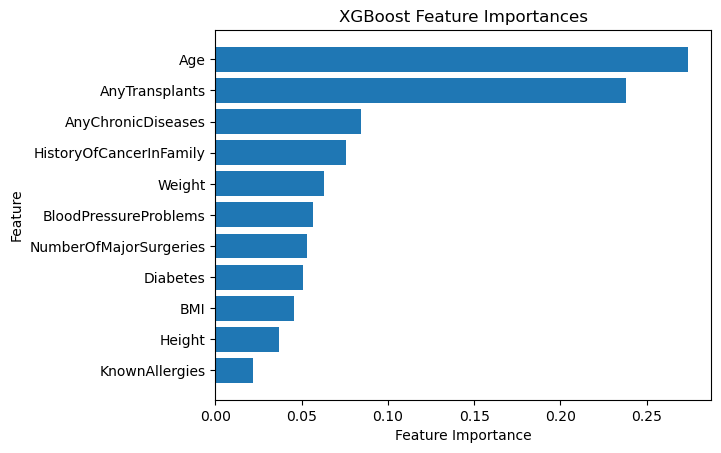

In [63]:
temp = pd.Series(model_xgb_best.feature_importances_, index=model_xgb_best.feature_names_in_)
temp = temp.sort_values(ascending=True)
plt.barh(temp.index, temp.values)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("XGBoost Feature Importances")
plt.show()

### Recommendations

Age, AnyTansplants, AnyChronicDisease, HistoryOfCancerInFamily and Weight are the most important features in determining the premium price. Of these five features, Age and Anytransplants have the most impact on premium price. So, a high value for these features would mean a high expected premium price.

Also, features BMI, Height and KnownAllergies have the least impact on premium price. So, presence of or elevation in levels of these features will not have a significant impact on the expected premium price.

The final model has decent performance and can be used for predicting bespoke insurance premiums for each customer. Thus, on one hand it will provide enhanced customization and reduced premiums to the customer, on the other hand it will help the insurance company in managing risks as now they will have premium values that will be fairly accurate thus help reduce non-performing assets (NPA). This will also help the insurance company in becoming more competitive.